<a href="https://colab.research.google.com/github/Kaiyang-Liu/business_analytics/blob/master/text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url_1 = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-t.txt"
file_1 = urllib.request.urlopen(url_1)

url_2 = "http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-t.txt"
file_2 = urllib.request.urlopen(url_2)

url_3 = "http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-t.txt"
file_3 = urllib.request.urlopen(url_3)

url_4 = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt"
file_4 = urllib.request.urlopen(url_4)
files = [file_1, file_2, file_3, file_4]



In [ ]:
ids = []
texts = []
id = 0
for file in files:
  doc_len = 0
  document_text = ""
  for line in file:
    formatted_string = str(line.strip())[1:]
    if len(formatted_string) < 20:
      continue
    document_text = document_text + formatted_string  
    doc_len = doc_len + 1
    if doc_len == 50:
      ids.append(id)
      texts.append(document_text)
      document_text = ""
      doc_len = 0

  id = id + 1

df = pd.DataFrame({'id': ids, 'text':texts})



In [ ]:
df

,id,text
0,0,'* A Project Gutenberg Canada Ebook *''This eb...
1,0,'of inferiority and shyness he had felt on bei...
2,0,"'very forceful, and Cohn never had a chance of..."
3,0,"'""You forgot to get your paper,"" I said.''""Tha..."
4,0,"'""None of your exalted connections getting div..."
...,...,...
354,3,"'Now they have beaten me, he thought. I am to..."
355,3,"'others too, he thought. I live in a good tow..."
356,3,"'fight again, he thought. I hope so much I do..."
357,3,'sailed up onto the little patch of shingle be...


In [ ]:
year_df = pd.DataFrame({'id':[0,1,2,3], 'year':[1926, 1927,1950,1952]})
year_df.head()

,id,year
0,0,1926
1,1,1927
2,2,1950
3,3,1952


In [ ]:
import re
# Remove punctuation
df['book_text_processed'] = df['text'].map(lambda x: re.sub('[\',.!?*]', '', str(x)))
# Convert the titles to lowercase
df['book_text_processed'] = df['book_text_processed'].replace(r'\n',' ', regex=True) 
df['book_text_processed'] = df['book_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: x.strip())
df.head()



,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project gutenberg canada ebook this ebook is...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and cohn never had a chance of n...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...","""you forgot to get your paper"" i said""that\s s..."
4,0,"'""None of your exalted connections getting div...","""none of your exalted connections getting divo..."


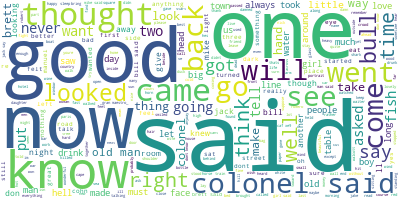

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['book_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


# K means



In [ ]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens] #ending ended -> end
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())


,1,100678,1030,11,1100,118of,12,1257thi,1300,1302thi,1305,1335,1700,17th,183260,1899-1961,1905,1909,1918,1925,1926edit,1927,1927edit,1942,1950edit,1952,1952date,1952edit,1954the,1st,2,201,2012date,2012project,2015date,2015project,2016date,2016project,20th,21,...,yourheart,yourluggag,yourposit,yourself,yoursmi,yoursshe\l,yourtemp,yourth,yourtrad,yourun,yourwif,youse,yousmok,yousom,yousometh,youstop,youth,youthat,youthink,youththeir,youto,youv,youviol,youwant,youwer,youwhat,youwil,youwould,yucatan,yuhh,zelli,zigzag,zinc,zizi,zonda,zurito,zuritobehind,zuritomanuel,zuritopul,zuritoth
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words ))
#df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
df

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...
...,...,...,...
354,3,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too ol...
355,3,"'others too, he thought. I live in a good tow...",too he thought i live in a good could not talk...
356,3,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do not...
357,3,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...


In [ ]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())


,a,abandon,abid,abl,abli,abnorm,aboard,about,abov,abox,abruptli,absent,absinth,absolut,absorb,absorpt,abstractli,abut,academi,accent,accept,accid,accident,acclam,accompani,accomplish,accord,accordingli,accordion,account,accur,accus,ace,acetylen,ach,acknowledg,acold,acquir,acrobat,across,...,worthi,worthless,would,wouldnt,wound,wrap,wrapper,wrath,wreath,wreck,wrench,wretch,wrinkl,wrist,write,writer,written,wrong,wrote,y,yacht,yard,ye,yeah,year,yell,yellow,yesterday,yet,york,you,youd,young,younger,your,yourself,youth,youv,zigzag,zinc
0,4,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0,0,2,0,0,0,0,0
1,19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
3,11,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,10,0,0,0,1,0,0,0,0,0
4,12,0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,21,0,0,0,3,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
355,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,11,0,0,0,2,0,0,0,0,0
356,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
357,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0


## Term frequency is given by: 
## Term Frequency Formula 
$tf(w,d) = log(1 + f(w,d))$ 

##Here f(w,d) is the frequency of word w in document d.
## Second step is to calculate the inverse term frequency.
## Inverse Document Frequency Formula
$idf(w, D) = log(\frac{N}{f(w,D)})$

## With N documents in the dataset and f(w, D) the frequency of word w in the whole dataset, this number will be lower with more appearances of the word in the whole dataset.
## Final step is to compute the TF-IDF score by the following formula:

$TF-IDF = tf*idf$

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=False)
matrix = vec.fit_transform(df['book_text_processed'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,abandon,abid,abl,abli,abnorm,aboard,abov,abox,abruptli,absent,absinth,absolut,absorb,absorpt,abstractli,abut,academi,accent,accept,accid,accident,acclam,accompani,accomplish,accord,accordingli,accordion,account,accur,accus,ace,acetylen,ach,acknowledg,acold,acquir,acrobat,act,action,activ,...,worri,wors,worship,worst,worth,worthi,worthless,wouldnt,wound,wrap,wrapper,wrath,wreath,wreck,wrench,wretch,wrinkl,wrist,write,writer,written,wrong,wrote,y,yacht,yard,ye,yeah,year,yell,yellow,yesterday,york,youd,young,younger,youth,youv,zigzag,zinc
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.072548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.072548,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.035714,0.0,0.0,0.000000,0.035714,0.0,0.035714,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.043519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043519,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.043519,0.0,0.0,0.0,0.043519,0.0,0.0,0.0,0.000000,0.0,0.043519,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.043602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.087204,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.043234,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.086468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.043234,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.043234,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.081992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.040996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
355,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046575,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
356,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=True)
matrix = vec.fit_transform(df['book_text_processed'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,abandon,abid,abl,abli,abnorm,aboard,abov,abox,abruptli,absent,absinth,absolut,absorb,absorpt,abstractli,abut,academi,accent,accept,accid,accident,acclam,accompani,accomplish,accord,accordingli,accordion,account,accur,accus,ace,acetylen,ach,acknowledg,acold,acquir,acrobat,act,action,activ,...,worri,wors,worship,worst,worth,worthi,worthless,wouldnt,wound,wrap,wrapper,wrath,wreath,wreck,wrench,wretch,wrinkl,wrist,write,writer,written,wrong,wrote,y,yacht,yard,ye,yeah,year,yell,yellow,yesterday,york,youd,young,younger,youth,youv,zigzag,zinc
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.087425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.067160,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.049098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.049601,0.0,0.0,0.000000,0.052430,0.0,0.045248,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.070004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112852,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.061223,0.0,0.0,0.0,0.066112,0.0,0.0,0.0,0.000000,0.0,0.065424,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.063667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.125792,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.099259,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.121904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.032396,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.07284,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.104897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.091395,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0
355,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0
356,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000

In [ ]:
from sklearn.cluster import KMeans
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(matrix) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      


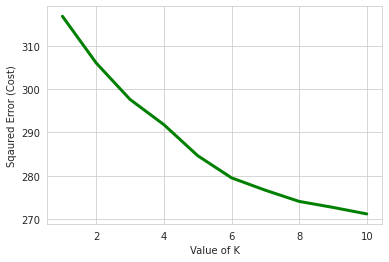

In [ ]:
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 


In [ ]:
from sklearn.cluster import KMeans

number_of_clusters=4
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(matrix)
# But you could fit the idf_df instead
km.fit


<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [ ]:
df['labels'] = km.labels_

In [ ]:
zf = (df.groupby(['id','labels']).size()/df.groupby(['id']).size()).reset_index(name ='accuracy')
zf.groupby('id')['accuracy'].max().reset_index(name='accuracy')


,id,accuracy
0,0,0.655738
1,1,0.472973
2,2,0.958678
3,3,1.000000


In [ ]:
from sklearn.decomposition import TruncatedSVD
sklearn_svd = TruncatedSVD(n_components = 2)
Y_sklearn = sklearn_svd.fit_transform(matrix)
df['Z_1'] = Y_sklearn[:,0]
df['Z_2'] = Y_sklearn[:,1]


In [ ]:
from sklearn.cluster import KMeans

number_of_clusters=4
svd_km = KMeans(n_clusters=number_of_clusters)
svd_km.fit(Y_sklearn)
df['svd_labels'] = svd_km.labels_


In [ ]:
zf = (df.groupby(['id','svd_labels']).size()/df.groupby(['id']).size()).reset_index(name ='accuracy')
zf.groupby('id')['accuracy'].max().reset_index(name='accuracy')


,id,accuracy
0,0,0.540984
1,1,0.783784
2,2,0.578512
3,3,0.809524


In [ ]:
zf.sort_values('accuracy',inplace=True, ascending=False)
zf

,id,svd_labels,accuracy
9,3,3,0.809524
3,1,0,0.783784
6,2,1,0.578512
1,0,2,0.540984
0,0,0,0.434426
7,2,3,0.421488
8,3,1,0.190476
4,1,2,0.175676
5,1,3,0.040541
2,0,3,0.024590


In [ ]:
id_map = {}
hash_done = {}
for _,row in zf.iterrows():
  if row['svd_labels'] in id_map:
    continue
  else:
    id_map[row['svd_labels']] = row['id']  

In [ ]:
map_df = pd.DataFrame({'id':map(int, list(id_map.values())),'transformed_id':map(int,list(id_map.keys()))})
map_df

,id,transformed_id
0,3,3
1,1,0
2,2,1
3,0,2


In [ ]:
plot_df = pd.merge(df,map_df,on='id',how='inner')
plot_df

,id,text,book_text_processed,labels,Z_1,Z_2,svd_labels,transformed_id
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...,1,0.102132,-0.056266,3,2
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...,1,0.256232,-0.067962,3,2
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...,3,0.425377,0.114968,0,2
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...,1,0.315012,-0.027447,0,2
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...,3,0.406730,0.182076,2,2
...,...,...,...,...,...,...,...,...
354,3,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too ol...,1,0.278364,-0.159171,3,3
355,3,"'others too, he thought. I live in a good tow...",too he thought i live in a good could not talk...,1,0.321857,-0.132933,3,3
356,3,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do not...,1,0.272222,-0.121252,3,3
357,3,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...,1,0.305682,-0.109955,3,3


NameError: ignored

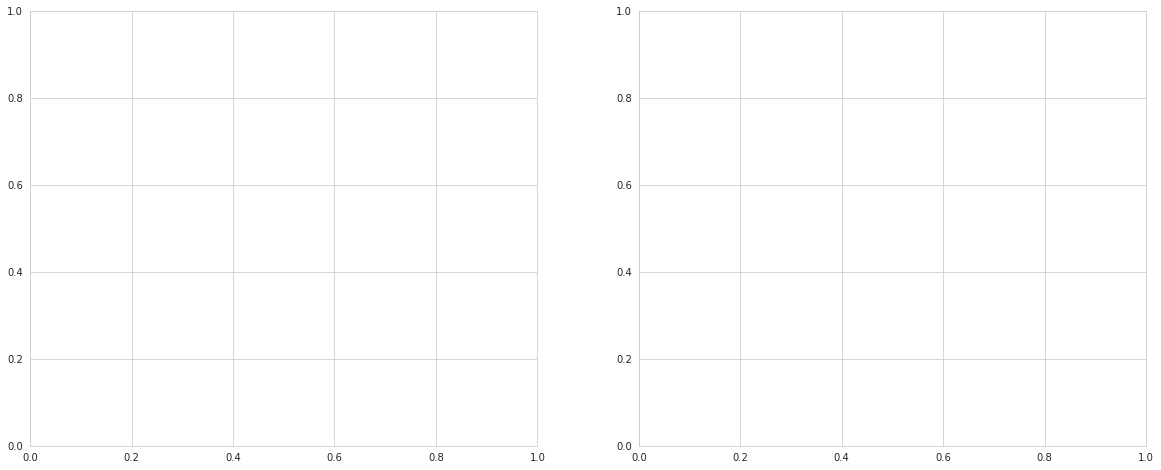

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = svd_km.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

axes[1].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=plot_df['transformed_id'], s=50, cmap='viridis')



In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 2
number_words = 100
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
the and he of wa a in to hi it on i with out him were up had at said that bull they down all as man there back went we not for from then into came go fish old one s over them come but you did through now hand could t bill see water head get watch two line so off right side their saw got tabl left by when look thought be would no again against boy long turn been under time street face crowd put road took what where romero across dark big brett sun veri

Topic #1:
the i and you to a it said he of in that wa is not we have they me with t had but at on colonel do be for all as him what she s go know there good my were like them no about are would can her hi up thi one when so will get if or out from think now your veri then don just well could thought did time ani been how come brett love dont who never want tell say too girl some see an ye look where take got down right jack make onli


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 21.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=0e4fbaccc320f4493611a60c8400e021becd04ba073176b0e2c677013594b401
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=7d17859ed6e3c39bc24f938ac9245368e6fce57deb902419997003bfdb8cd79e
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#if 1 == 1:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
#with open(LDAvis_data_filepath, 'w') as f:
#  pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
#    LDAvis_prepared = pickle.load(f)


In [ ]:
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')


In [ ]:
from google.colab import files
files.download('ldavis_prepared_2.html') 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>